In [22]:
from droplet_growth import mic, register
import matplotlib.pyplot as plt
from multiprocessing import Pool
import tifffile as tf
from glob import glob
import pandas as pd
from nd2tif.transform import to_8bits
from functools import partial
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


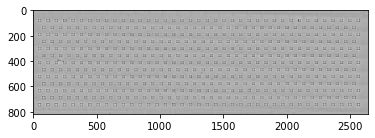

selecting 501/611 regions


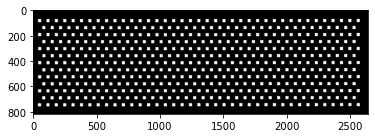

selecting 501/501 regions


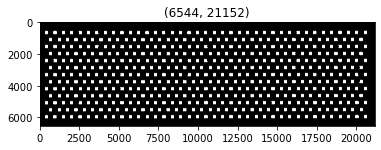

In [2]:
template8_path = "/home/aaristov/Multicell1/SGR/20201003-MIC/template/BF-bin8-with-channel.tif"
mask8_path = "/home/aaristov/Multicell1/SGR/20201003-MIC/template/mask-bin8-with-channel.tif"
mask_path = "/home/aaristov/Multicell1/SGR/20201003-MIC/template/mask-bin1-with-channel.tif"

template8 = tf.imread(template8_path)
plt.imshow(template8, cmap='gray')
plt.show()
mask8 = tf.imread(mask8_path) > 0
good_mask8 = mic.segment.filter_mask(mask8, size_lim=(15, 30),)
plt.imshow(good_mask8, cmap='gray')
plt.show()
mask = tf.imread(mask_path) > 0
good_mask = mic.segment.filter_mask(mask, size_lim=(150, 300),)
plt.imshow(good_mask, cmap='gray')
plt.title(good_mask.shape)
plt.show()


In [11]:
path5 = "/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/*f.tif"
path9 = "/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/*P.tif"
path10 = "/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/*c.tif"
path17 = "/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/*P.tif"
path18 = "/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight//tifs/*ng*.tif"

In [4]:
paths5 = glob(path5)
paths5

['/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/10ng-scan2D-BF-WFtritc-fitc001tiftif.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/6ng-scan2D-BF-WFtritc-fitctif.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/10ng-scan2D-BF-WFtritc-fitc001tif.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/4ng-scan2D-BF-WFtritc001tif.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/0ng-scan2D-BF-WFtritctif.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/12ng-scan2D-BF-WFtritc-fitc002tif.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/Process_Folder_nd2_tiftif.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/5ng-scan2D-BF-WFtritc-after-washtif.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/5ng-scan2D-BF-WFtritctif.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/2ng-scan2D-

In [22]:
paths10 = glob(path10)
paths10

['/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/8ng-scan2D-BF-WFtritc-fitc.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/6ng-scan2D-BF-WFtritc-fitc.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/2ng-scan2D-BF-WFtritc-fitc.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/0ng-scan2D-BF-WFtritc-fitc.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/10ng-scan2D-BF-WFtritc-fitc.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/7ng-scan2D-BF-WFtritc-fitc.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/4ng-scan2D-BF-WFtritc-fitc.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/5ng-scan2D-BF-WFtritc-fitc.tif']

In [5]:
paths9 = glob(path9)
paths9

['/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/7ng-scan3D-BF-CFtritc-MaxIP.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/2ng-scan3D-BF-CFtritc-MaxIP.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/8ng-scan3D-BF-CFtritc-MaxIP.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/5ng-scan3D-BF-CFtritc-MaxIP.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/9ng-scan3D-BF-CFtritc-MaxIP.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/10ng-scan3D-BF-CFtritc-MaxIP.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/0ng-scan3D-BF-WFtritc-MP.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/6ng-scan3D-BF-CFtritc001-MaxIP.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/4ng-scan3D-BF-CFtritc-MaxIP.tif']

In [29]:
paths17 = glob(path17)
paths17

['/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/8ng-scan3D-BF-CFtritc004-MaxIP.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/10ng-scan3D-BF-CFtritc005-MaxIP.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/0ng-scan3D-BF-CFtritc-MaxIP.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/12ng-scan3D-BF-CFtritc006-MaxIP.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/4ng-scan3D-BF-CFtritc002-MaxIP.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/16ng-scan3D-BF-CFtritc008-MaxIP.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/2ng-scan3D-BF-CFtritc001-MaxIP.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/14ng-scan3D-BF-CFtritc007-MaxIP.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/20ng-scan3D-BF-CFtritc009-MaxIP.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/6ng-scan3D-BF-CFtritc003-MaxIP.tif']

In [18]:
paths18 = glob(path18)
paths18

['/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight//tifs/6ng-scan2D-BF-CFtritc-fitc.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight//tifs/12ng-scan2D-BF-CFtritc-fitc002.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight//tifs/10ng-scan2D-BF-CFtritc-fitc001.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight//tifs/16ng-scan2D-BF-CFtritc-fitc004.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight//tifs/10ng-scan2D-BF-CFtritc-fitc.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight//tifs/14ng-scan2D-BF-CFtritc-fitc003.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight//tifs/20ng-scan2D-BF-CFtritc-fitc005.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight//tifs/8ng-scan2D-BF-CFtritc-fitc001.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight//tifs/4ng-scan2D-BF-CFtritc-fitc.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight//tifs/8ng-scan2

In [25]:
# def align_stack(path, plot=False):
#     print (path)
#     stack = tf.imread(path)

#     stack.shape

#     bf, tritc = stack[:2]

#     tvec8 = register.get_transform(register.filter_vertical_horizontal_stripes(bf[::8, ::8]), template8, plot=plot)
#     tvec = register.scale_tvec(tvec8, 8)

#     aligned_tritc = register.unpad(register.transform(tritc, tvec), mask.shape)
#     aligned_bf = register.unpad(register.transform(bf, tvec), mask.shape)
    
#     if plot:
#         plt.show()
#         plt.figure(dpi=300)
#         plt.imshow(aligned_tritc, cmap='gray',)# vmax=aligned_tritc.max()/5)
#         plt.colorbar()
#         plt.show()

#         saturated_tritc = aligned_tritc.copy()
#         saturated_tritc[saturated_tritc > 500] = 500
#         plt.figure(dpi=300)
#         plt.imshow(mic.segment.label2rgb(mic.segment.label(mask), to_8bits(saturated_tritc), bg_label=0))
#         plt.show()

#     aligned_stack = register.np.stack((aligned_bf, aligned_tritc, mask)).astype('uint16')

#     tf.imwrite(path.replace('.tif', '.aligned.tif'), aligned_stack)
    
#     return aligned_stack

In [7]:
list(map(align_stack, paths5))

/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/10ng-scan2D-BF-WFtritc-fitc001tiftif.tif


KeyboardInterrupt: 

In [14]:
list(map(align_stack, paths9))

/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/7ng-scan3D-BF-CFtritc-MaxIP.tif
/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/2ng-scan3D-BF-CFtritc-MaxIP.tif
/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/8ng-scan3D-BF-CFtritc-MaxIP.tif
/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/5ng-scan3D-BF-CFtritc-MaxIP.tif
/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/9ng-scan3D-BF-CFtritc-MaxIP.tif
/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/10ng-scan3D-BF-CFtritc-MaxIP.tif
/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/0ng-scan3D-BF-WFtritc-MP.tif
/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/6ng-scan3D-BF-CFtritc001-MaxIP.tif
/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/4ng-scan3D-BF-CFtritc-MaxIP.tif


[None, None, None, None, None, None, None, None, None]

In [26]:
list(map(align_stack, paths10))

/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/8ng-scan2D-BF-WFtritc-fitc.tif
/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/6ng-scan2D-BF-WFtritc-fitc.tif
/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/2ng-scan2D-BF-WFtritc-fitc.tif


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/0ng-scan2D-BF-WFtritc-fitc.tif


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/10ng-scan2D-BF-WFtritc-fitc.tif


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/7ng-scan2D-BF-WFtritc-fitc.tif
/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/4ng-scan2D-BF-WFtritc-fitc.tif


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/5ng-scan2D-BF-WFtritc-fitc.tif


[array([[[1465, 1444, 1426, ..., 1547, 1586, 1583],
         [1484, 1469, 1459, ..., 1549, 1569, 1565],
         [1517, 1479, 1466, ..., 1538, 1553, 1560],
         ...,
         [1362, 1418, 1473, ..., 1393, 1378, 1344],
         [1375, 1416, 1468, ..., 1376, 1365, 1356],
         [1377, 1380, 1425, ..., 1367, 1385, 1393]],
 
        [[ 481,  486,  497, ...,  662,  669,  664],
         [ 489,  485,  489, ...,  653,  666,  671],
         [ 494,  487,  486, ...,  665,  671,  678],
         ...,
         [ 475,  478,  476, ...,  472,  472,  464],
         [ 472,  469,  470, ...,  476,  471,  469],
         [ 474,  473,  467, ...,  472,  469,  473]],
 
        [[   0,    0,    0, ...,    0,    0,    0],
         [   0,    0,    0, ...,    0,    0,    0],
         [   0,    0,    0, ...,    0,    0,    0],
         ...,
         [   0,    0,    0, ...,    0,    0,    0],
         [   0,    0,    0, ...,    0,    0,    0],
         [   0,    0,    0, ...,    0,    0,    0]]], dtype=uint16),

In [30]:
_=list(map(align_stack, paths17))

/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/8ng-scan3D-BF-CFtritc004-MaxIP.tif
/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/10ng-scan3D-BF-CFtritc005-MaxIP.tif
/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/0ng-scan3D-BF-CFtritc-MaxIP.tif
/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/12ng-scan3D-BF-CFtritc006-MaxIP.tif
/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/4ng-scan3D-BF-CFtritc002-MaxIP.tif
/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/16ng-scan3D-BF-CFtritc008-MaxIP.tif
/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/2ng-scan3D-BF-CFtritc001-MaxIP.tif
/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/14ng-scan3D-BF-CFtritc007-MaxIP.tif
/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/20ng-scan3D-BF-CFtritc009-MaxIP.tif
/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/6ng-scan3D-BF-CFtritc003-MaxIP.tif


In [24]:
p = Pool(11)
_=p.map(partial(register.align_stack, template8=template8, mask=good_mask), paths18)
p.close()

/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight//tifs/12ng-scan2D-BF-CFtritc-fitc002.tif (3, 7769, 22236)
/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight//tifs/6ng-scan2D-BF-CFtritc-fitc.tif (3, 7769, 22236)
/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight//tifs/10ng-scan2D-BF-CFtritc-fitc001.tif (3, 7769, 22236)
/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight//tifs/16ng-scan2D-BF-CFtritc-fitc004.tif (3, 7769, 22236)
/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight//tifs/8ng-scan2D-BF-CFtritc-fitc001.tif (3, 7769, 22236)
/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight//tifs/10ng-scan2D-BF-CFtritc-fitc.tif /home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight//tifs/20ng-scan2D-BF-CFtritc-fitc005.tif(3, 7769, 22236) 
(3, 7769, 22236)
/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight//tifs/14ng-scan2D-BF-CFtritc-fitc003.tif /home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight//tifs/4ng-scan2D-BF-CFtritc-fi

/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/7ng-scan3D-BF-CFtritc-MaxIP.tif


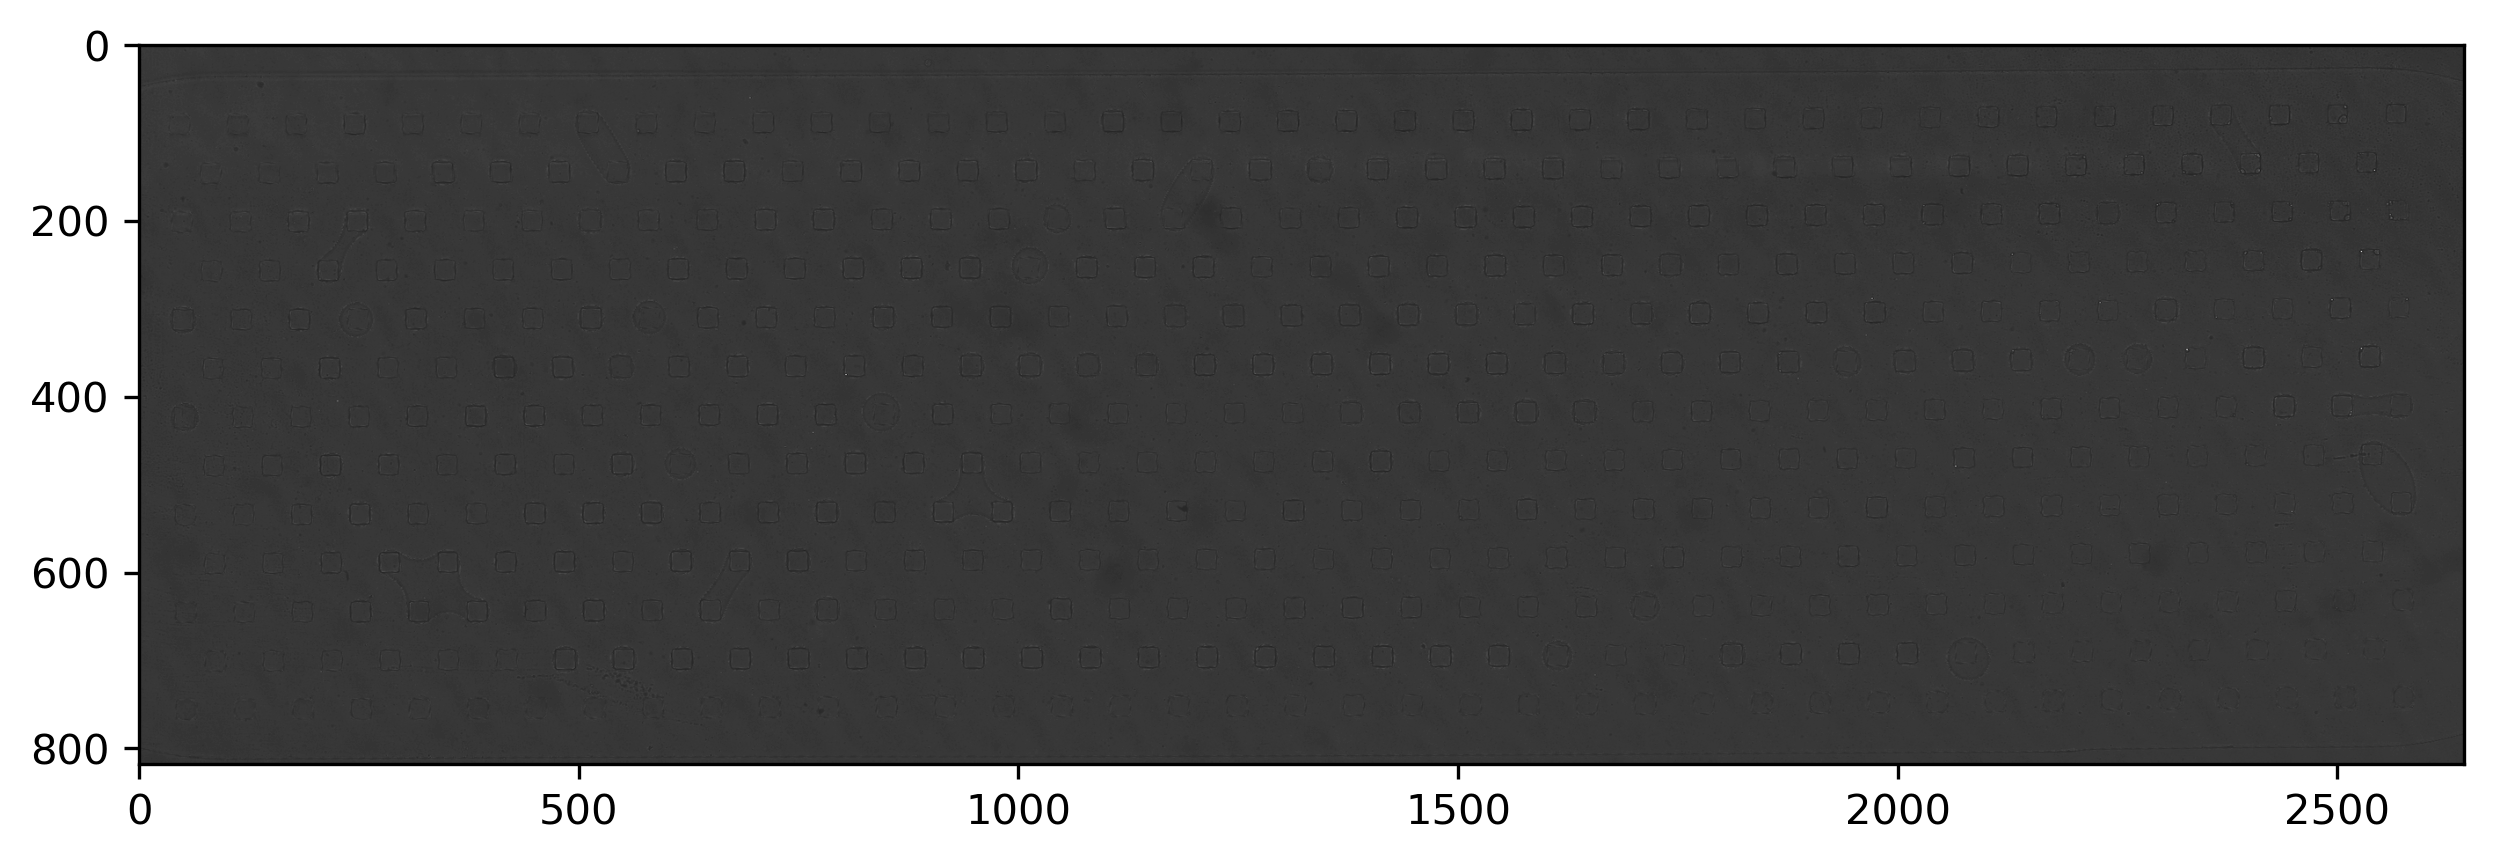

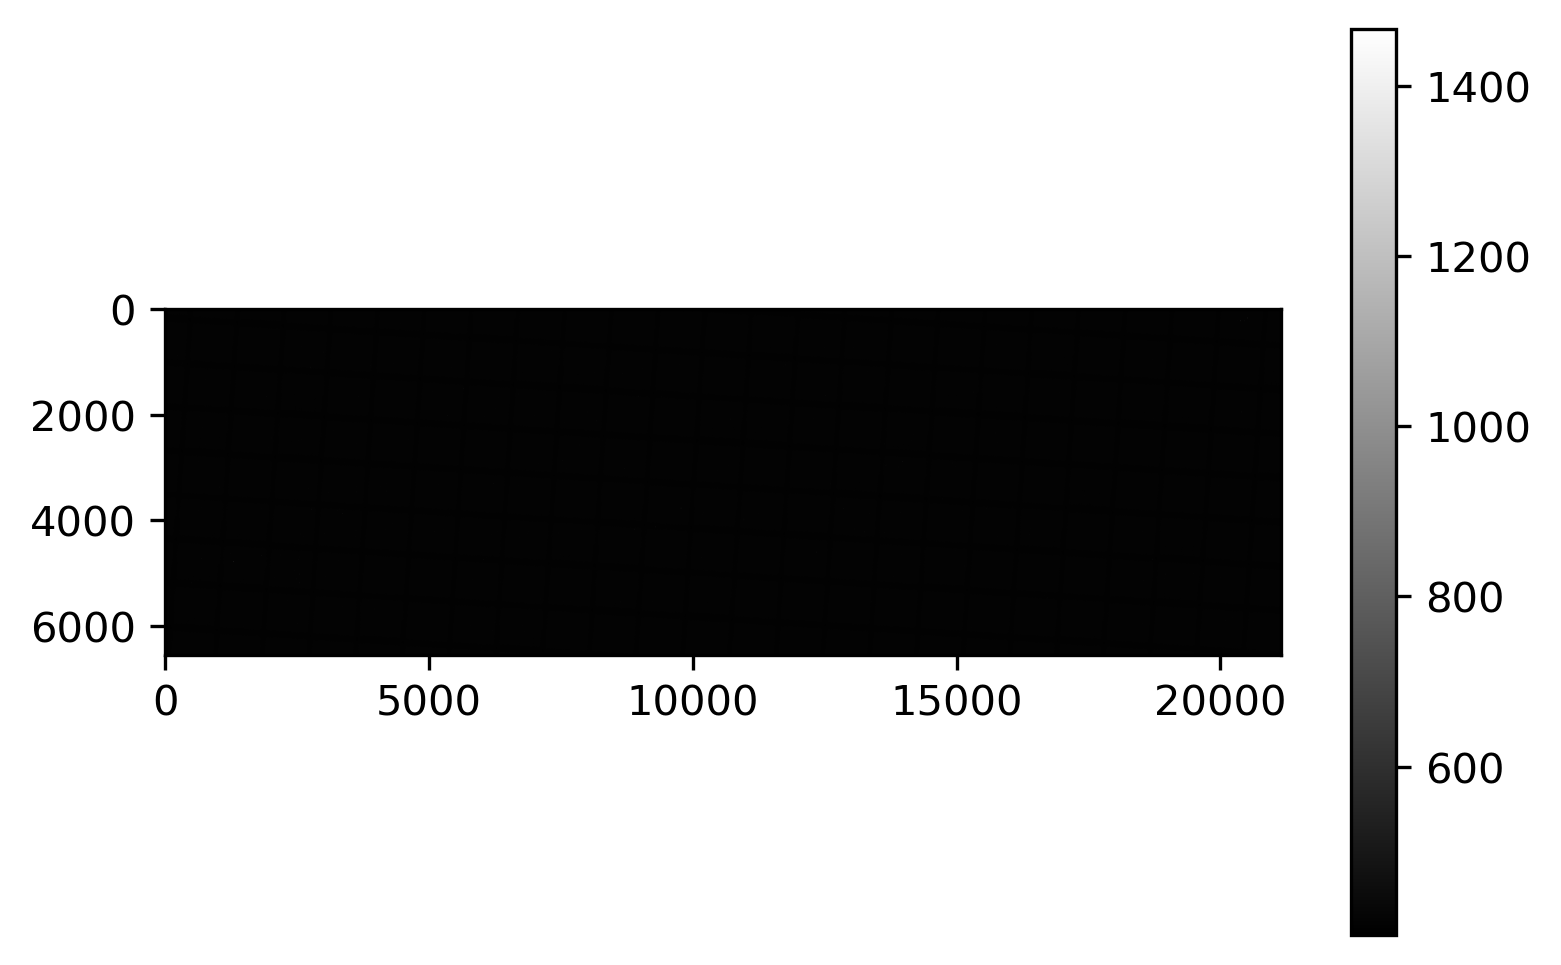

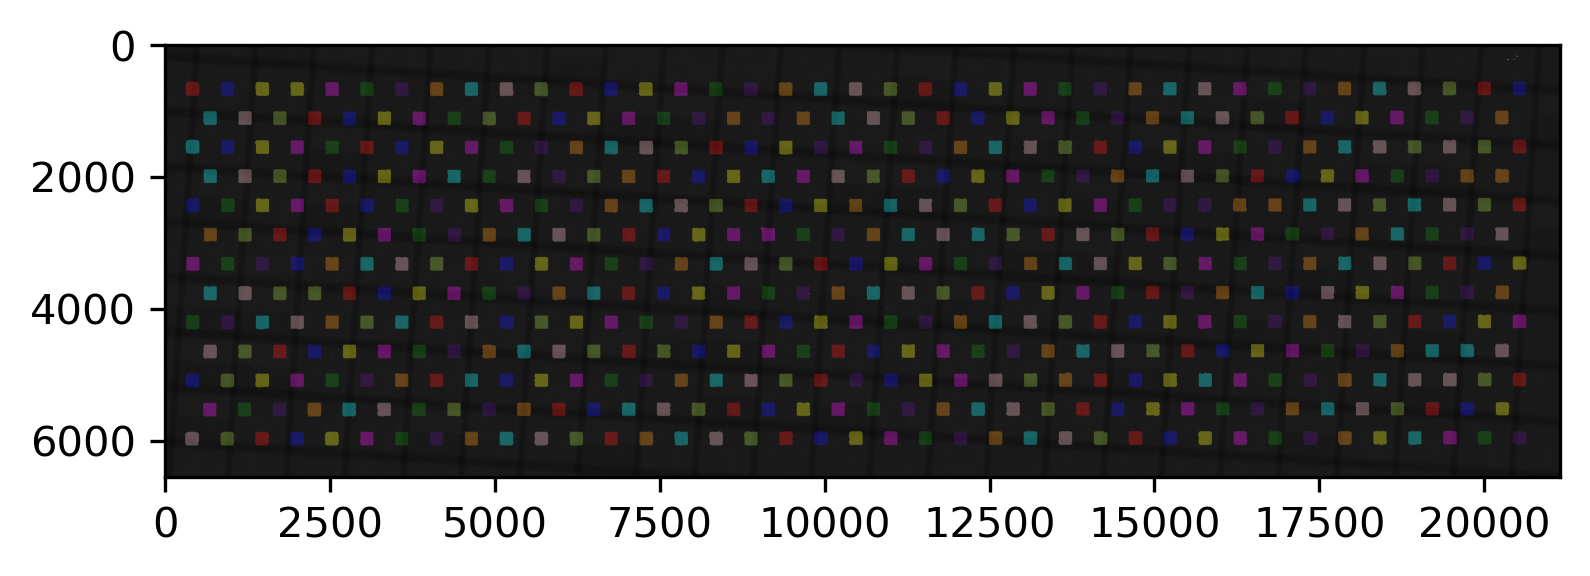

In [12]:
align_stack(paths9[0])

In [120]:

plt.figure(dpi=300)
plt.imshow(mic.segment.label2rgb(mic.segment.label(good_mask), to_8bits(tvec['timg']), bg_label=0))

ValueError: `image` and `label` must be the same shape

<Figure size 1800x1200 with 0 Axes>

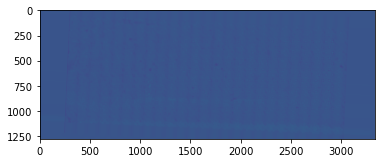

In [109]:
plt.imshow(tvec['timg'])

In [70]:
mic.segment.label(good_mask).max()

501

In [71]:
df = pd.DataFrame(mic.regionprops_table(mic.segment.label(good_mask), aligned_tritc, properties=('mean_intensity', 'max_intensity')))
df.loc[:, 'bg'] = mic.np.median(aligned_tritc)
    

In [72]:
df

mean_intensity  max_intensity     bg
0        453.768473            476  458.0
1        462.117647            491  458.0
2        464.974874            490  458.0
3        443.873484            481  458.0
4        455.557432            479  458.0
..              ...            ...    ...
496      487.785714           1499  458.0
497      464.473684            601  458.0
498      467.909699            499  458.0
499      455.236088            488  458.0
500      464.098639            493  458.0

[501 rows x 3 columns]

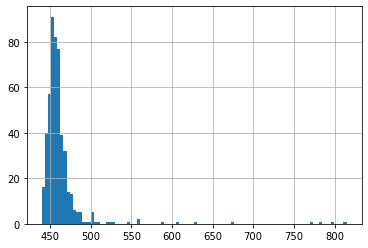

In [74]:
df.mean_intensity.hist(bins=100)